In [38]:
import torch
from torch.utils.data import Dataset, DataLoader

In [39]:
def forward(x):
    return w*x+b

def criterion(yhat, y):
    return torch.mean((yhat-y)**2)

In [40]:
class Data(Dataset):
    def __init__(self):
        
        self.x = torch.arange(-3,3,0.1).view(-1,1)
        self.y = -3*self.x + 1
        self.len = self.x.shape[0]
        
    def __getitem__(self,index):
        return self.x[index], self.y[index]

    def __len__(self):
        return self.len

In [41]:
dataset = Data()

trainloader = DataLoader(dataset=dataset, batch_size=1)

In [42]:
w = torch.tensor(-15.0, requires_grad=True)
b = torch.tensor(-10.0, requires_grad=True)

In [45]:
lr = 0.1
Cost = []
for x,y in trainloader:
    yhat = forward(x)
    loss = criterion(yhat, y)
    loss.backward()
    w.data = w.data - lr*w.grad.data
    b.data = b.data - lr*b.grad.data
    w.grad.data.zero_()
    b.grad.data.zero_()
    Cost.append(loss.item())

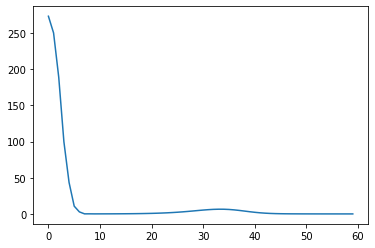

In [46]:
import matplotlib.pyplot as plt
niter = torch.arange(0,60,1)
niter = niter.numpy()
plt.plot(niter, Cost)
plt.show()